In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib notebook

In [3]:
# Create a reference the CSV file desired
csv_path = "clean_houston_data.csv"

# Read the CSV into a Pandas DataFrame
clean_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
clean_df.head()

,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902


In [4]:
# Create a reference the CSV file desired
pop_path = "population.csv"

# Read the CSV into a Pandas DataFrame
pop_df = pd.read_csv(pop_path)

# Print the first five rows of data to the screen
pop_df.head()

,Rank,Location City,2019 Census Estimates,2010 Census,% Change
0,1,Houston,"2,325,502","2,099,451",10.77%
1,2,San Antonio,"1,532,233","1,327,407",13.90%
2,3,Dallas,"1,345,047","1,197,816",12.29%
3,4,Austin,"964,254","790,390",22.00%
4,5,Fort Worth,"895,008","741,206",20.75%


In [5]:



cities = ['Houston','South Houston', 'Katy', 'League City', 'Pasadena','Pearland','Sugar Land', 'Cypress']
pop1_df = pop_df.loc[pop_df['Location City'].isin(cities)]

In [6]:
pop1_df.head(10)

,Rank,Location City,2019 Census Estimates,2010 Census,% Change
0,1,Houston,"2,325,502","2,099,451",10.77%
18,19,Pasadena,"153,219","149,043",2.80%
28,29,Pearland,"122,149","91,252",31.44%
30,31,Sugar Land,"118,600","78,817",50.48%
36,37,League City,"106,244","83,560",25.54%
68,69,Katy,"21,729","14,102",35.10%
69,70,Cypress,"182,459","122,803",32.69%


In [7]:
#Python String Methods: str(), upper(), lower(), count(), find(), replace() & len()
pop1_df["Location City"] = pop1_df["Location City"].str.upper()
pop1_df

<ipython-input-7-6e9014aa0389>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop1_df["Location City"] = pop1_df["Location City"].str.upper()


,Rank,Location City,2019 Census Estimates,2010 Census,% Change
0,1,HOUSTON,"2,325,502","2,099,451",10.77%
18,19,PASADENA,"153,219","149,043",2.80%
28,29,PEARLAND,"122,149","91,252",31.44%
30,31,SUGAR LAND,"118,600","78,817",50.48%
36,37,LEAGUE CITY,"106,244","83,560",25.54%
68,69,KATY,"21,729","14,102",35.10%
69,70,CYPRESS,"182,459","122,803",32.69%


In [8]:
cities = ['HOUSTON', 'PASADENA','PEARLAND', 'SUGAR LAND', 'LEAGUE CITY', 'KATY', 'CYPRESS'] 
census = [2325502, 153219, 122149, 118600, 106244, 21729, 182459 ] 
  
city_series = pd.Series(cities) 
census_series = pd.Series(census) 
  
frame = { 'Location City': city_series, '2019 Census Estimates': census }
pop2 = pd.DataFrame(frame) 

print(pop2.info())

  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Location City          7 non-null      object
 1   2019 Census Estimates  7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None


In [9]:
liquor_df = clean_df.groupby('Location City', as_index=False)['Liquor Receipts'].sum()
liquor_df.sort_values(by=['Liquor Receipts'])


,Location City,Liquor Receipts
6,SOUTH HOUSTON,8281466
3,LEAGUE CITY,80980972
4,PASADENA,106477798
0,CYPRESS,124959916
5,PEARLAND,127506901
7,SUGAR LAND,234162156
2,KATY,292599960
1,HOUSTON,6445408904


In [10]:
liquorcaptia_df = pd.merge(liquor_df, pop2, on="Location City")
liquorcaptia_df

,Location City,Liquor Receipts,2019 Census Estimates
0,CYPRESS,124959916,182459
1,HOUSTON,6445408904,2325502
2,KATY,292599960,21729
3,LEAGUE CITY,80980972,106244
4,PASADENA,106477798,153219
5,PEARLAND,127506901,122149
6,SUGAR LAND,234162156,118600


In [ ]:
#lcapita_df = clean_df.groupby('Location City', as_index=False)['Liquor Receipts'].sum() / liquorcaptia_df['2019 Census Estimates'] * 100
#lcapita_df

In [11]:
lcapita_df = liquorcaptia_df['Liquor Receipts']/liquorcaptia_df['2019 Census Estimates']
lcapita_df


0      684.865729
1     2771.620452
2    13465.873257
3      762.216897
4      694.938604
5     1043.863650
6     1974.385801
dtype: float64

In [12]:
#capita = [684.865729,2771.620452,13465.873257,762.216897,694.938604,1043.863650,1974.385801]

#liquorcapita_df['Per Capita'] = capita


NameError: name 'liquorcapita_df' is not defined

In [14]:
# Create a reference the CSV file desired
csv_path = "per_capita.csv"

# Read the CSV into a Pandas DataFrame
capita_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
capita_df.head(10)

,Rank,Location City,Liquor,Wine,Beer,2019 Census Estimates,2010 Census,% Change,Liquor per capita,Wine per capita,Beer per capita
0,1,Houston,6453690370,2736345615,3693453599,2325502,2099451,10.77%,2775.181604,1176.668786,1588.239270
1,19,Pasadena,106477798,6326538,93107326,153219,149043,2.80%,45.787016,2.720504,40.037517
2,29,Pearland,127506901,24841772,69279232,122149,91252,31.44%,54.829839,10.682327,29.791087
3,31,Sugar Land,234162156,83170769,140518763,118600,78817,50.48%,100.693165,35.764652,60.425131
4,37,League City,80980972,10240838,49690440,106244,83560,25.54%,34.823007,4.403711,21.367619
5,69,Katy,292599960,68856618,199776953,21729,14102,35.10%,125.822278,29.609357,85.907023
6,70,Cypress,124959916,25106779,87627246,182459,122803,32.69%,53.734598,10.796284,37.681002


In [15]:
greater_df = capita_df.loc[capita_df['Location City'] != 'Houston']
greater_df

,Rank,Location City,Liquor,Wine,Beer,2019 Census Estimates,2010 Census,% Change,Liquor per capita,Wine per capita,Beer per capita
1,19,Pasadena,106477798,6326538,93107326,153219,149043,2.80%,45.787016,2.720504,40.037517
2,29,Pearland,127506901,24841772,69279232,122149,91252,31.44%,54.829839,10.682327,29.791087
3,31,Sugar Land,234162156,83170769,140518763,118600,78817,50.48%,100.693165,35.764652,60.425131
4,37,League City,80980972,10240838,49690440,106244,83560,25.54%,34.823007,4.403711,21.367619
5,69,Katy,292599960,68856618,199776953,21729,14102,35.10%,125.822278,29.609357,85.907023
6,70,Cypress,124959916,25106779,87627246,182459,122803,32.69%,53.734598,10.796284,37.681002


In [16]:
greater_df.set_index("Location City",drop=True,inplace=True)
greater_df

,Rank,Liquor,Wine,Beer,2019 Census Estimates,2010 Census,% Change,Liquor per capita,Wine per capita,Beer per capita
Location City,,,,,,,,,,
Pasadena,19,106477798,6326538,93107326,153219,149043,2.80%,45.787016,2.720504,40.037517
Pearland,29,127506901,24841772,69279232,122149,91252,31.44%,54.829839,10.682327,29.791087
Sugar Land,31,234162156,83170769,140518763,118600,78817,50.48%,100.693165,35.764652,60.425131
League City,37,80980972,10240838,49690440,106244,83560,25.54%,34.823007,4.403711,21.367619
Katy,69,292599960,68856618,199776953,21729,14102,35.10%,125.822278,29.609357,85.907023
Cypress,70,124959916,25106779,87627246,182459,122803,32.69%,53.734598,10.796284,37.681002


<IPython.core.display.Javascript object>


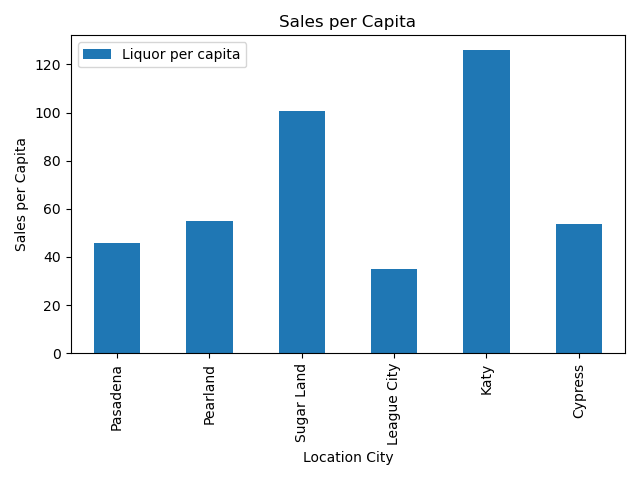

In [17]:
greater_df[["Liquor per capita"]].plot(kind="bar", stacked=True)
plt.title("Sales per Capita")
plt.xlabel("Location City")
plt.ylabel("Sales per Capita")
plt.tight_layout()

<IPython.core.display.Javascript object>


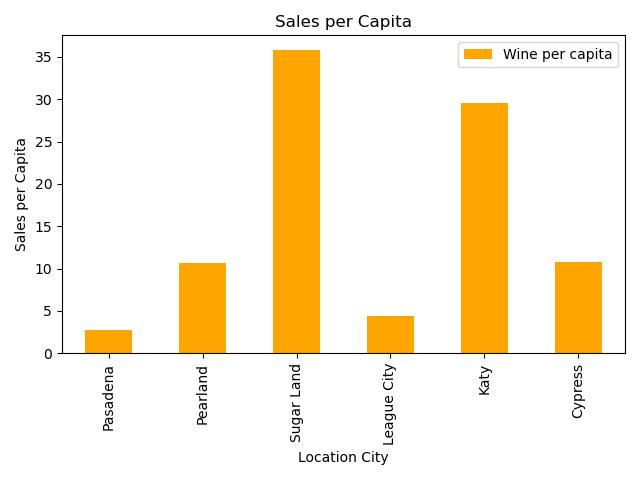

In [18]:
greater_df[["Wine per capita"]].plot(kind="bar", stacked=True,color='orange')
plt.title("Sales per Capita")
plt.xlabel("Location City")
plt.ylabel("Sales per Capita")
plt.tight_layout()

<IPython.core.display.Javascript object>


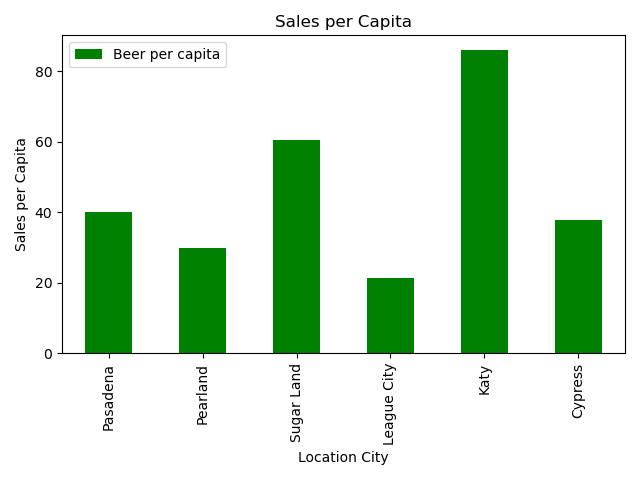

In [19]:
greater_df[["Beer per capita"]].plot(kind="bar", stacked=True,color='green')
plt.title("Sales per Capita")
plt.xlabel("Location City")
plt.ylabel("Sales per Capita")
plt.tight_layout()

<IPython.core.display.Javascript object>


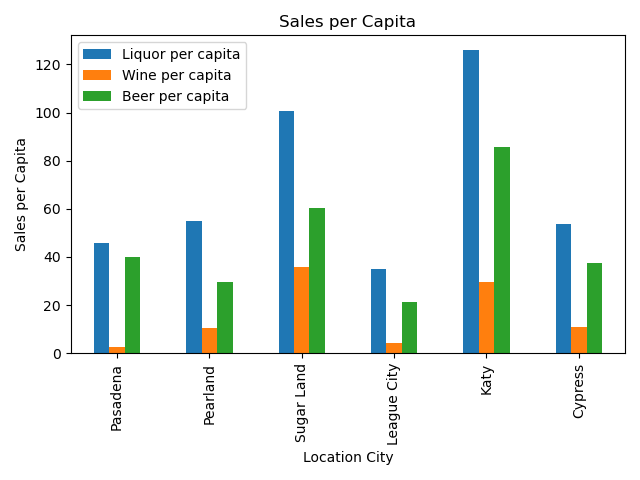

In [20]:
greater_df[["Liquor per capita","Wine per capita","Beer per capita"]].plot(kind="bar", stacked=False,)
plt.title("Sales per Capita")
plt.xlabel("Location City")
plt.ylabel("Sales per Capita")
plt.tight_layout()


In [21]:

houston_df = capita_df.loc[capita_df['Location City'] == 'Houston']
houston_df


,Rank,Location City,Liquor,Wine,Beer,2019 Census Estimates,2010 Census,% Change,Liquor per capita,Wine per capita,Beer per capita
0,1,Houston,6453690370,2736345615,3693453599,2325502,2099451,10.77%,2775.181604,1176.668786,1588.23927


In [22]:
houston_df.set_index("Location City",drop=True,inplace=True)
houston_df

,Rank,Liquor,Wine,Beer,2019 Census Estimates,2010 Census,% Change,Liquor per capita,Wine per capita,Beer per capita
Location City,,,,,,,,,,
Houston,1,6453690370,2736345615,3693453599,2325502,2099451,10.77%,2775.181604,1176.668786,1588.23927


<IPython.core.display.Javascript object>


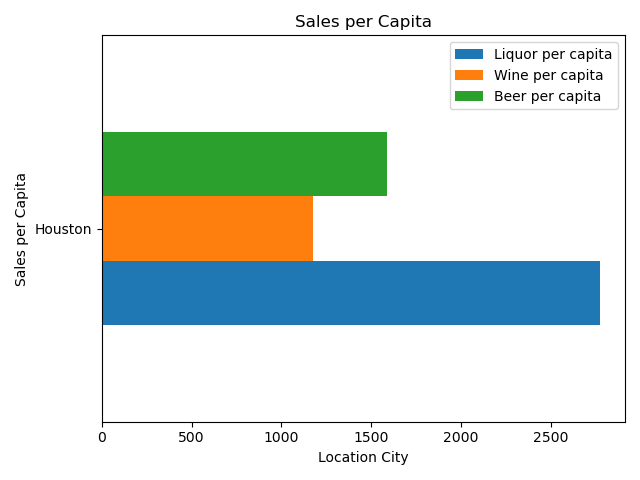

In [23]:
houston_df[["Liquor per capita","Wine per capita","Beer per capita"]].plot(kind="barh", stacked=False,)
plt.title("Sales per Capita")
plt.xlabel("Location City")
plt.ylabel("Sales per Capita")
plt.tight_layout()